# CUDA MergeSort Strong Scaling Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['v1048576-input3-v2.cali', 'v262144-input0-v32.cali', 'v65536-input0-v256.cali', 'v1048576-input1-v64.cali', 'v16777216-input2-v32.cali', 'v262144-input3-v8.cali', 'v16777216-input2-v1.cali', 'v65536-input3-v4.cali', 'v1048576-input2-v32.cali', 'v262144-input2-v256.cali', 'v4194305-input3-v128.cali', 'v1048576-input3-v4.cali', 'v65536-input0-v32.cali', 'v16777216-input1-v256.cali', 'v16777216-input3-v64.cali', 'v65536-input3-v64.cali', 'v16777216-input3-v128.cali', 'v1048576-input2-v4.cali', 'v1048576-input1-v8.cali', 'v65536-input3-v16.cali', 'v16777216-input2-v2.cali', 'v16777216-input3-v32.cali', 'v65536-input1-v4.cali', 'v1048576-input1-v128.cali', 'v1048576-input2-v64.cali', 'v262144-input3-v128.cali', 'v16777216-input3-v8.cali', 'v65536-input2-v256.cali', 'v65536-input2-v64.cali', 'v1048576-input2-v16.cali', 'v4194305-input3-v4.cali', 'v4194305-input3-v256.cali', 'v262144-input0-v2.cali', 'v4194305-input3-v16.cali', 'v16777216-input1-v16.cali', 'v262144-input2-v16.cali', 'v41943

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(8671516, 'v262144-input3-v256.cali'),
             (44091453, 'v4194305-input2-v128.cali'),
             (58440835, 'v16777216-input0-v2.cali'),
             (76786853, 'v16777216-input0-v32.cali'),
             (77196017, 'v262144-input2-v64.cali'),
             (80591504, 'v1048576-input1-v64.cali'),
             (84376274, 'v262144-input3-v4.cali'),
             (102273371, 'v16777216-input3-v16.cali'),
             (138885607, 'v16777216-input2-v32.cali'),
             (196264272, 'v1048576-input3-v32.cali'),
             (244049362, 'v262144-input1-v32.cali'),
             (264137306, 'v65536-input0-v2.cali'),
             (287808066, 'v4194305-input3-v8.cali'),
             (301897107, 'v262144-input1-v256.cali'),
             (306754799, 'v65536-input1-v1.cali'),
             (310137372, 'v262144-input1-v1.cali'),
             (311222983, 'v1048576-input3-v2.cali'),
             (328524893, 'v4194305-input2-v16.cali'),
             (358204925, 'v65536-input0-v64.ca

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
├─ -1.000 comp_large
│  └─ -1.000 comp_small
├─ -1.000 data_init
└─ -1.000 data_validation

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            8671516       1   
                                                44091453      1   
                                                58440835      1   
                                                76786853      1   
                                                77196017      1   
                                                80591504      1   
                                                84376274      1   
                                                102273371     1   
                                                138885607     1   
                                                196264272     1   
                                                244049362     1   
                                                264137306     1   
                                                287808066     1   
                                                301897107     1   
                                                306754799     1   
                                                310137372     1   
                                                311222983     1   
                                                328524893     1   
                                                358204925     1   
                                                365143094     1   
                                                381842774     1   
                                                382231175     1   
                                                395602946     1   
                                                398846564     1   
                                                442369960     1   
                                                453632840     1   
                                                456941575     1   
                                                462866790     1   
                                                465991297     1   
                                                467873917     1   
                                                484547645     1   
                                                487486139     1   
                                                498632568     1   
                                                560518681     1   
                                                577222158     1   
                                                643724998     1   
                                                667914561     1   
                                                678488515     1   
                                                738900608     1   
                                                763383476     1   
                                                784597958     1   
                                                823209358     1   
                                                957346126     1   
                                                972329100     1   
                                                974488494     1   
                                                1013574595    1   
                                                1102298252    1   
                                                1126799294    1   
                                                1131632243    1   
                                                1165650726    1   
                                                1179539382    1   
                                                1190377945    1   
                                                1376046046    1   
                                                1406685544    1   
                                                1420618808    1   
                                                1475389331    1   
                                                1484098812    1   
                                                1544686501    1   
                                        

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                            profile                     
{'name': 'main', 'type': 'function'}            8671516          0.497816   
                                                44091453         2.110800   
                                                58440835         7.313608   
                                                76786853         7.385199   
                                                77196017         0.490866   
                                                80591504         0.920392   
                                                84376274         0.485410   
                                                102273371       10.145565   
                                                138885607        7.609586   
                                                196264272        0.866773   
                                                244049362        0.487768   
                                                264137306        0.377987   
                                                287808066        2.580286   
                                                301897107        0.519618   
                                                306754799        0.501725   
                                                310137372        0.498747   
                                                311222983        0.882578   
                                                328524893        2.072615   
                                                358204925        0.362965   
                                                365143094        0.453920   
                                                381842774        0.365704   
                                                382231175        0.478930   
                                                395602946        0.453946   
                                                398846564        0.944140   
                                                442369960        2.087084   
                                                453632840       10.271054   
                                                456941575        7.466620   
                                                462866790        0.436023   
                                                465991297        0.459524   
                                                467873917        7.443715   
                                                484547645        7.991962   
                                                487486139        0.951038   
                                                498632568        0.399797   
                                                560518681        2.638328   
                                                577222158        2.964857   
                                                643724998        0.899792   
                                                667914561        7.677372   
                                                678488515        2.108040   
                                                738900608        0.805328   
                                                763383476        0.779345   
                                                784597958        0.385541   
                                                823209358        0.484737   
                                                957346126        0.831192   
                                                972329100       10.483001   
                                                974488494        0.359878   
                                                1013574595       0.392796   
                                                1102298252       0.465382   
                                                1126799294       0.373442   
                                                1131632243       0.443552   
                                                1165650726       0.367648   
                                                11795393

Metadata

In [9]:
tk.metadata

cali.caliper.version  \
profile                           
8671516              2.11.0-dev   
44091453             2.11.0-dev   
58440835             2.11.0-dev   
76786853             2.11.0-dev   
77196017             2.11.0-dev   
80591504             2.11.0-dev   
84376274             2.11.0-dev   
102273371            2.11.0-dev   
138885607            2.11.0-dev   
196264272            2.11.0-dev   
244049362            2.11.0-dev   
264137306            2.11.0-dev   
287808066            2.11.0-dev   
301897107            2.11.0-dev   
306754799            2.11.0-dev   
310137372            2.11.0-dev   
311222983            2.11.0-dev   
328524893            2.11.0-dev   
358204925            2.11.0-dev   
365143094            2.11.0-dev   
381842774            2.11.0-dev   
382231175            2.11.0-dev   
395602946            2.11.0-dev   
398846564            2.11.0-dev   
442369960            2.11.0-dev   
453632840            2.11.0-dev   
456941575            2.11.0-dev   
462866790            2.11.0-dev   
465991297            2.11.0-dev   
467873917            2.11.0-dev   
484547645            2.11.0-dev   
487486139            2.11.0-dev   
498632568            2.11.0-dev   
560518681            2.11.0-dev   
577222158            2.11.0-dev   
643724998            2.11.0-dev   
667914561            2.11.0-dev   
678488515            2.11.0-dev   
738900608            2.11.0-dev   
763383476            2.11.0-dev   
784597958            2.11.0-dev   
823209358            2.11.0-dev   
957346126            2.11.0-dev   
972329100            2.11.0-dev   
974488494            2.11.0-dev   
1013574595           2.11.0-dev   
1102298252           2.11.0-dev   
1126799294           2.11.0-dev   
1131632243           2.11.0-dev   
1165650726           2.11.0-dev   
1179539382           2.11.0-dev   
1190377945           2.11.0-dev   
1376046046           2.11.0-dev   
1406685544           2.11.0-dev   
1420618808           2.11.0-dev   
1475389331           2.11.0-dev   
1484098812           2.11.0-dev   
1544686501           2.11.0-dev   
1577136689           2.11.0-dev   
1589596170           2.11.0-dev   
1598154402           2.11.0-dev   
1602223338           2.11.0-dev   
1620332689           2.11.0-dev   
1642540211           2.11.0-dev   
1644473144           2.11.0-dev   
1688915385           2.11.0-dev   
1689955739           2.11.0-dev   
1692629921           2.11.0-dev   
1707478289           2.11.0-dev   
1711246518           2.11.0-dev   
1754988373           2.11.0-dev   
1774593297           2.11.0-dev   
1875821932           2.11.0-dev   
1878594690           2.11.0-dev   
1882112086           2.11.0-dev   
1891848029           2.11.0-dev   
1894235058           2.11.0-dev   
1895532020           2.11.0-dev   
1932684689           2.11.0-dev   
1987519653           2.11.0-dev   
1988573435           2.11.0-dev   
1999879783           2.11.0-dev   
2002855761           2.11.0-dev   
2018637092           2.11.0-dev   
2069810762           2.11.0-dev   
2164225678           2.11.0-dev   
2193314312           2.11.0-dev   
2222877037           2.11.0-dev   
2247057245           2.11.0-dev   
2249586671           2.11.0-dev   
2266753446           2.11.0-dev   
2276157295           2.11.0-dev   
2292247782           2.11.0-dev   
2336584092           2.11.0-dev   
2339960462           2.11.0-dev   
2354540498           2.11.0-dev   
2370008427           2.11.0-dev   
2375413707           2.11.0-dev   
2389096586           2.11.0-dev   
2473146400           2.11.0-dev   
2484533245           2.11.0-dev   
2486846453           2.11.0-dev   
2492583588           2.11.0-dev   
2513014309           2.11.0-dev   
2518321567           2.11.0-dev   
2522314997           2.11.0-dev   
2532706992           2.11.0-dev   
2570956190           2.11.0-dev   
2596881076           2.11.0-dev   
2610060995           2.11.0-dev   
2612305856           2.11.0-dev   
2637853353           2.11.0-dev   
2638625378           

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
tk.metadata

cali.caliper.version  \
profile                           
8671516              2.11.0-dev   
44091453             2.11.0-dev   
58440835             2.11.0-dev   
76786853             2.11.0-dev   
77196017             2.11.0-dev   
80591504             2.11.0-dev   
84376274             2.11.0-dev   
102273371            2.11.0-dev   
138885607            2.11.0-dev   
196264272            2.11.0-dev   
244049362            2.11.0-dev   
264137306            2.11.0-dev   
287808066            2.11.0-dev   
301897107            2.11.0-dev   
306754799            2.11.0-dev   
310137372            2.11.0-dev   
311222983            2.11.0-dev   
328524893            2.11.0-dev   
358204925            2.11.0-dev   
365143094            2.11.0-dev   
381842774            2.11.0-dev   
382231175            2.11.0-dev   
395602946            2.11.0-dev   
398846564            2.11.0-dev   
442369960            2.11.0-dev   
453632840            2.11.0-dev   
456941575            2.11.0-dev   
462866790            2.11.0-dev   
465991297            2.11.0-dev   
467873917            2.11.0-dev   
484547645            2.11.0-dev   
487486139            2.11.0-dev   
498632568            2.11.0-dev   
560518681            2.11.0-dev   
577222158            2.11.0-dev   
643724998            2.11.0-dev   
667914561            2.11.0-dev   
678488515            2.11.0-dev   
738900608            2.11.0-dev   
763383476            2.11.0-dev   
784597958            2.11.0-dev   
823209358            2.11.0-dev   
957346126            2.11.0-dev   
972329100            2.11.0-dev   
974488494            2.11.0-dev   
1013574595           2.11.0-dev   
1102298252           2.11.0-dev   
1126799294           2.11.0-dev   
1131632243           2.11.0-dev   
1165650726           2.11.0-dev   
1179539382           2.11.0-dev   
1190377945           2.11.0-dev   
1376046046           2.11.0-dev   
1406685544           2.11.0-dev   
1420618808           2.11.0-dev   
1475389331           2.11.0-dev   
1484098812           2.11.0-dev   
1544686501           2.11.0-dev   
1577136689           2.11.0-dev   
1589596170           2.11.0-dev   
1598154402           2.11.0-dev   
1602223338           2.11.0-dev   
1620332689           2.11.0-dev   
1642540211           2.11.0-dev   
1644473144           2.11.0-dev   
1688915385           2.11.0-dev   
1689955739           2.11.0-dev   
1692629921           2.11.0-dev   
1707478289           2.11.0-dev   
1711246518           2.11.0-dev   
1754988373           2.11.0-dev   
1774593297           2.11.0-dev   
1875821932           2.11.0-dev   
1878594690           2.11.0-dev   
1882112086           2.11.0-dev   
1891848029           2.11.0-dev   
1894235058           2.11.0-dev   
1895532020           2.11.0-dev   
1932684689           2.11.0-dev   
1987519653           2.11.0-dev   
1988573435           2.11.0-dev   
1999879783           2.11.0-dev   
2002855761           2.11.0-dev   
2018637092           2.11.0-dev   
2069810762           2.11.0-dev   
2164225678           2.11.0-dev   
2193314312           2.11.0-dev   
2222877037           2.11.0-dev   
2247057245           2.11.0-dev   
2249586671           2.11.0-dev   
2266753446           2.11.0-dev   
2276157295           2.11.0-dev   
2292247782           2.11.0-dev   
2336584092           2.11.0-dev   
2339960462           2.11.0-dev   
2354540498           2.11.0-dev   
2370008427           2.11.0-dev   
2375413707           2.11.0-dev   
2389096586           2.11.0-dev   
2473146400           2.11.0-dev   
2484533245           2.11.0-dev   
2486846453           2.11.0-dev   
2492583588           2.11.0-dev   
2513014309           2.11.0-dev   
2518321567           2.11.0-dev   
2522314997           2.11.0-dev   
2532706992           2.11.0-dev   
2570956190           2.11.0-dev   
2596881076           2.11.0-dev   
2610060995           2.11.0-dev   
2612305856           2.11.0-dev   
2637853353           2.11.0-dev   
2638625378           

In [11]:
gb = tk.groupby(["InputSize", "InputType"])

20  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2afb960cf9d0>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2afb96131fd0>, (65536, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2afb960fa760>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2afb96131040>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2afb961ede80>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2afb961c1760>, (262144, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2afb961c1d60>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2afb961a4730>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2afb961d3070>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2afb9614a760>, (1048576, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2afb96133460>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2afb9612da90>, (4194305, '1%perturbed'): <thicket.thicket.Thicket object at 0x2afb96266730

Compose these 3 groups column-wise to get a holistic view of the data

In [12]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [13]:
ctk.dataframe

(65536, 1%perturbed)  \
                                                                   Avg time/rank   
node                                            num_threads                        
{'name': 'main', 'type': 'function'}            1                       0.371744   
                                                2                       0.369946   
                                                4                       0.387817   
                                                8                       0.372297   
                                                16                      0.373442   
                                                32                      0.365704   
                                                64                      0.372533   
                                                128                     0.394595   
                                                256                     0.388869   
{'name': 'comm', 'type': 'function'}            1                       0.000161   
                                                2                       0.000138   
                                                4                       0.000155   
                                                8                       0.000174   
                                                16                      0.000141   
                                                32                      0.000145   
                                                64                      0.000138   
                                                128                     0.000153   
                                                256                     0.000155   
{'name': 'comp_large', 'type': 'function'}      1                       0.000439   
                                                2                       0.000328   
                                                4                       0.000340   
                                                8                       0.000424   
                                                16                      0.000418   
                                                32                      0.000404   
                                                64                      0.000326   
                                                128                     0.000342   
                                                256                     0.000416   
{'name': 'comp_small', 'type': 'function'}      1                       0.000335   
                                                2                       0.000242   
                                                4                       0.000256   
                                                8                       0.000320   
                                                16                      0.000314   
                                                32                      0.000305   
                                                64                      0.000241   
                                                128                     0.000257   
                                                256                     0.000314   
{'name': 'data_init', 'type': 'function'}       1                       0.003032   
                                                2                       0.003024   
                                                4                       0.003113   
                                                8                       0.003120   
                                                16                      0.003034   
                                                32                      0.003020   
                                                64                      0.003041   
                                                128                     0.003096   
                                                256                     0.003085   
{'name': 'data_validation', 

In [14]:
ctk.metadata

(65536, 1%perturbed)  \
            cali.caliper.version   
num_threads                        
1                     2.11.0-dev   
2                     2.11.0-dev   
4                     2.11.0-dev   
8                     2.11.0-dev   
16                    2.11.0-dev   
32                    2.11.0-dev   
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
1            min#inclusive#sum#time.duration,max#inclusive#...   
2            min#inclusive#sum#time.duration,max#inclusive#...   
4            min#inclusive#sum#time.duration,max#inclusive#...   
8            min#inclusive#sum#time.duration,max#inclusive#...   
16           min#inclusive#sum#time.duration,max#inclusive#...   
32           min#inclusive#sum#time.duration,max#inclusive#...   
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
1                                                     2   
2                                                     2   
4                                                     2   
8                                                     2   
16                                                    2   
32                                                    2   
64                                                    2   
128                                                   2   
256                                                   2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
1            cuda.gputime,node.order  regionprofile         spot   
2            cuda.gputime,node.order  regionprofile         spot   
4            cuda.gputime,node.order  regionprofile         spot   
8            cuda.gputime,node.order  regionprofile         spot   
16           cuda.gputime,node.order  regionprofile         spot   
32           cuda.gputime,node.order  regionprofile         spot   
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   

                                                                        \
            spot:cuda.gputime spot:node.order              spot:output   
num_threads                                                              
1                        true            true    v65536-input3-v1.cali   
2                        true            true    v65536-input3-v2.cali   
4                        true            true    v65536-input3-v4.cali   
8                        true            true    v65536-input3-v8.cali   
16                       true            true   v65536-input3-v16.cali   
32                       true            true   v65536-input3-v32.cali   
64                       true            true   v65536-input3-v64.cali   
128                      true            true  v65536-input3-v128.cali   
256                      true            true  v65536-input3-v256.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
1            1701757885  [/scratch/group/csce435-f23/Caliper/caliper/li...   
2            1700080849  [/scratch/group/csce435-f23/Calipe

Perform pandas operations to get the table in a desirable format for plotting

In [15]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [16]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-16-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [17]:
ctk.dataframe

(65536, 1%perturbed)                    \
                                   Avg time/rank Avg GPU time/rank   
name            num_threads                                          
main            1                       0.371744          0.024003   
                2                       0.369946          0.027167   
                4                       0.387817          0.027204   
                8                       0.372297          0.025912   
                16                      0.373442          0.028166   
                32                      0.365704          0.026445   
                64                      0.372533          0.026536   
                128                     0.394595          0.029552   
                256                     0.388869          0.026569   
comm            1                       0.000161          0.000025   
                2                       0.000138          0.000025   
                4                       0.000155          0.000025   
                8                       0.000174          0.000025   
                16                      0.000141          0.000025   
                32                      0.000145          0.000025   
                64                      0.000138          0.000025   
                128                     0.000153          0.000025   
                256                     0.000155          0.000025   
comp_large      1                       0.000439          0.023955   
                2                       0.000328          0.027118   
                4                       0.000340          0.027155   
                8                       0.000424          0.025864   
                16                      0.000418          0.028117   
                32                      0.000404          0.026397   
                64                      0.000326          0.026488   
                128                     0.000342          0.029504   
                256                     0.000416          0.026520   
comp_small      1                       0.000335          0.023955   
                2                       0.000242          0.027118   
                4                       0.000256          0.027155   
                8                       0.000320          0.025864   
                16                      0.000314          0.028117   
                32                      0.000305          0.026397   
                64                      0.000241          0.026488   
                128                     0.000257          0.029504   
                256                     0.000314          0.026520   
data_init       1                       0.003032               NaN   
                2                       0.003024               NaN   
                4                       0.003113               NaN   
                8                       0.003120               NaN   
                16                      0.003034               NaN   
                32                      0.003020               NaN   
                64                      0.003041               NaN   
                128                     0.003096               NaN   
                256                     0.003085               NaN   
data_validation 1                       0.008538               NaN   
                2                       0.008531               NaN   
                4                       0.008639               NaN   
                8                       0.008615               NaN   
                16                      0.008521               NaN   
                32                      0.008489               NaN   
                64                      0.008546               NaN   
                128                     0.008643               NaN   
                256                     0.008719               NaN   

                            (65536, R

In [18]:
# Define common variables
input_sizes = set(tk.metadata["InputSize"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [19]:
print(input_sizes)
print(function_names)

{262144, 4194305, 65536, 16777216, 1048576}
{'data_init', 'comm', 'comp_large', 'data_validation', 'comp_small', 'main'}


In [20]:
ctk.dataframe.columns

MultiIndex([(     (65536, '1%perturbed'),     'Avg time/rank'),
            (     (65536, '1%perturbed'), 'Avg GPU time/rank'),
            (          (65536, 'Random'),     'Avg time/rank'),
            (          (65536, 'Random'), 'Avg GPU time/rank'),
            (   (65536, 'ReverseSorted'),     'Avg time/rank'),
            (   (65536, 'ReverseSorted'), 'Avg GPU time/rank'),
            (          (65536, 'Sorted'),     'Avg time/rank'),
            (          (65536, 'Sorted'), 'Avg GPU time/rank'),
            (    (262144, '1%perturbed'),     'Avg time/rank'),
            (    (262144, '1%perturbed'), 'Avg GPU time/rank'),
            (         (262144, 'Random'),     'Avg time/rank'),
            (         (262144, 'Random'), 'Avg GPU time/rank'),
            (  (262144, 'ReverseSorted'),     'Avg time/rank'),
            (  (262144, 'ReverseSorted'), 'Avg GPU time/rank'),
            (         (262144, 'Sorted'),     'Avg time/rank'),
            (         (262144, 'Sorted')

<Axes: xlabel='num_threads'>

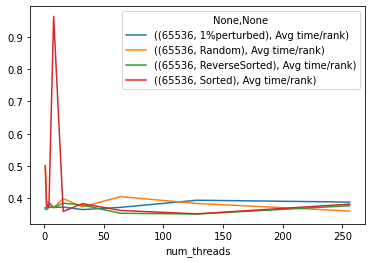

In [21]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["main"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [22]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [23]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [24]:
ctk.dataframe.loc["main"]

(65536, 1%perturbed)                   (65536, Random)  \
                   Avg time/rank Avg GPU time/rank   Avg time/rank   
num_threads                                                          
1                       0.371744          0.024003        0.501725   
2                       0.369946          0.027167        0.392796   
4                       0.387817          0.027204        0.380536   
8                       0.372297          0.025912        0.371508   
16                      0.373442          0.028166        0.399797   
32                      0.365704          0.026445        0.373872   
64                      0.372533          0.026536        0.405705   
128                     0.394595          0.029552        0.384670   
256                     0.388869          0.026569        0.361315   

                              (65536, ReverseSorted)                    \
            Avg GPU time/rank          Avg time/rank Avg GPU time/rank   
num_threads                                                              
1                    0.026523               0.367648          0.021327   
2                    0.031077               0.365649          0.025320   
4                    0.031374               0.373302          0.020743   
8                    0.027868               0.372397          0.019599   
16                   0.029991               0.385541          0.025414   
32                   0.027868               0.379770          0.019827   
64                   0.032454               0.354242          0.018824   
128                  0.027733               0.351985          0.021324   
256                  0.029581               0.377595          0.025000   

            (65536, Sorted)                   (262144, 1%perturbed)  \
              Avg time/rank Avg GPU time/rank         Avg time/rank   
num_threads                                                           
1                  0.500573          0.019466              0.480645   
2                  0.377987          0.022134              0.490104   
4                  0.371489          0.018850              0.485410   
8                  0.963144          0.017297              0.519704   
16                 0.359878          0.019635              0.507595   
32                 0.384150          0.020423              0.497602   
64                 0.362965          0.018472              0.484737   
128                0.352444          0.018029              0.477418   
256                0.382536          0.020888              0.497816   

                              (262144, Random)                    \
            Avg GPU time/rank    Avg time/rank Avg GPU time/rank   
num_threads                                                        
1                    0.099450         0.498747          0.109561   
2                    0.109636         0.482136          0.100850   
4                    0.107559         0.478930          0.111825   
8                    0.120067         0.486857          0.116882   
16                   0.103905         0.484548          0.109083   
32                   0.107104         0.487768          0.112692   
64                   0.112754         0.507857          0.110575   
128                  0.099324         0.498205          0.110941   
256                  0.109261         0.519618          0.143106   

            (262144, ReverseSorted)                   (262144, Sorted)  \
                      Avg time/rank Avg GPU time/rank    Avg time/rank   
num_threads                                                              
1                          0.455181          0.081391         0.460699   
2                          0.464102          0.090146         0.443552   
4                          0.436023          0.074669         0.438457   
8                          0.467711          0.093710         0.463705   
16                         0.484406          0.101829         0.465382   
32                  

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


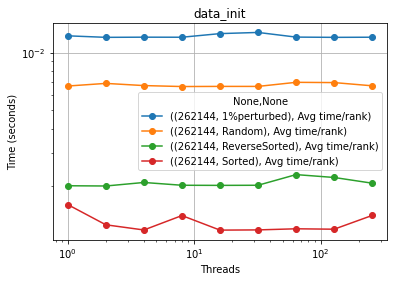

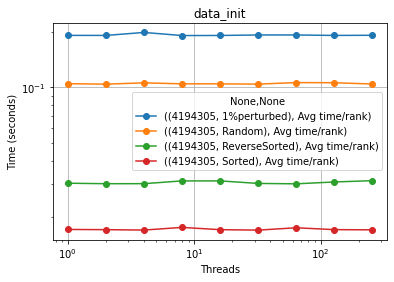

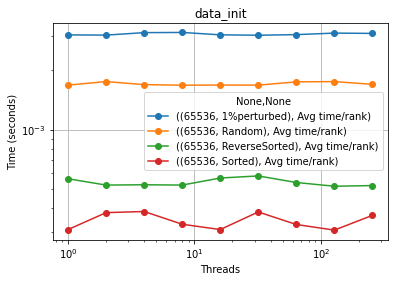

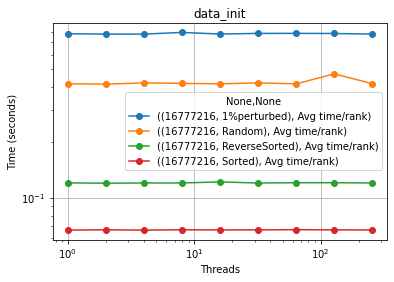

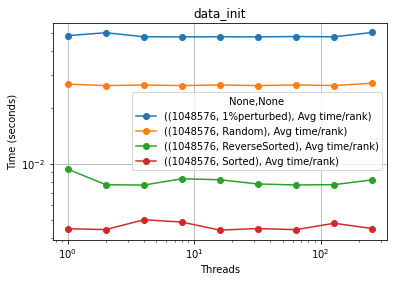

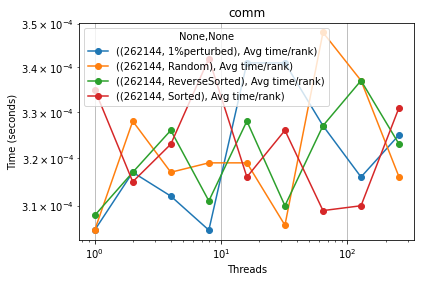

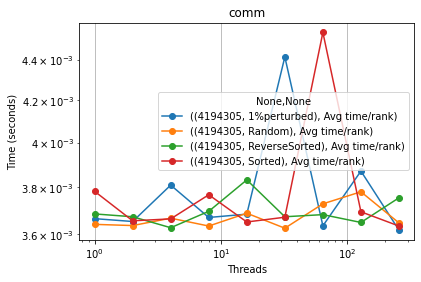

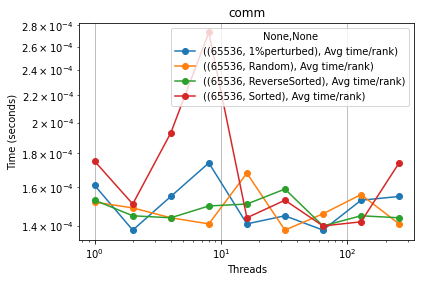

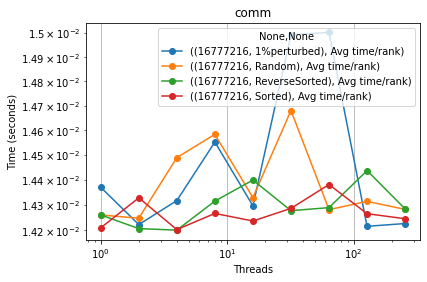

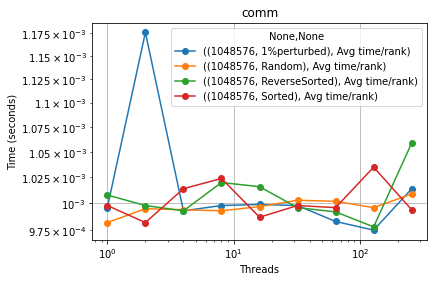

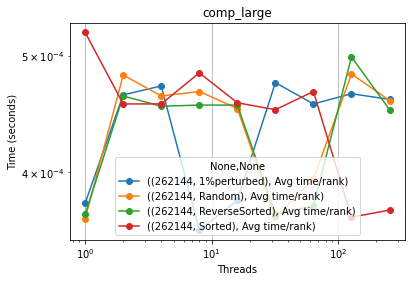

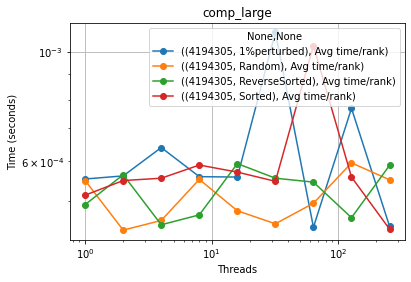

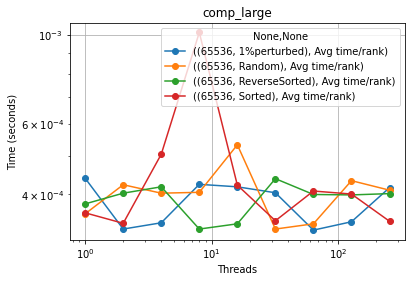

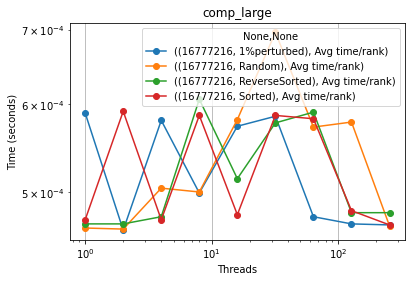

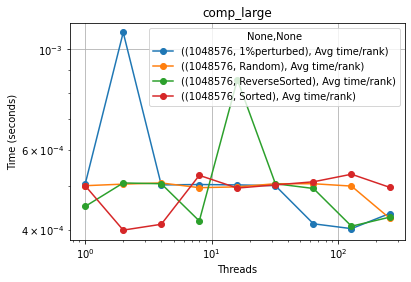

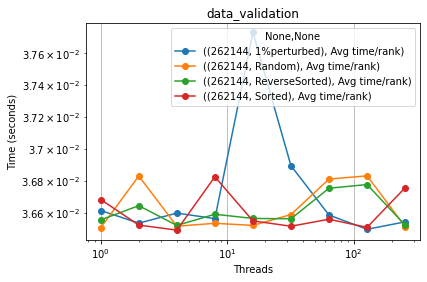

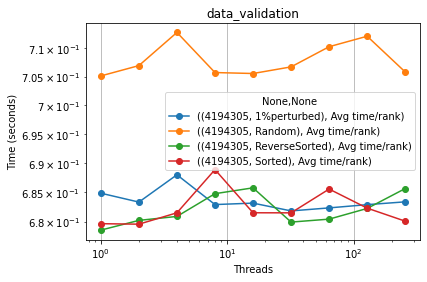

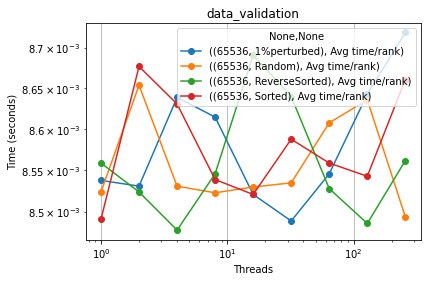

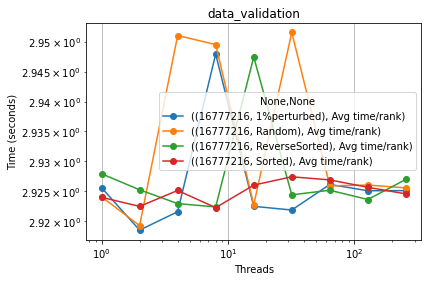

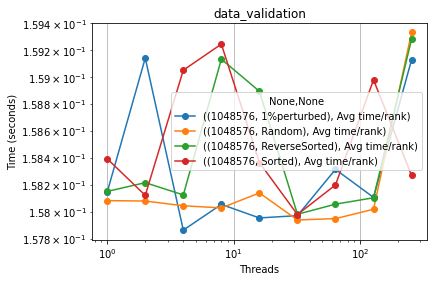

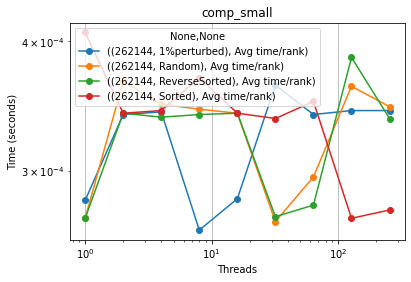

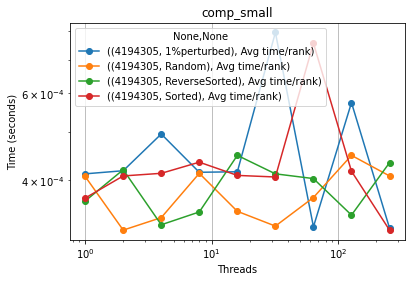

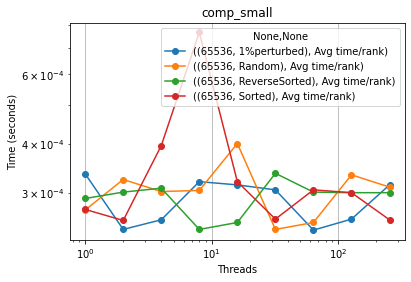

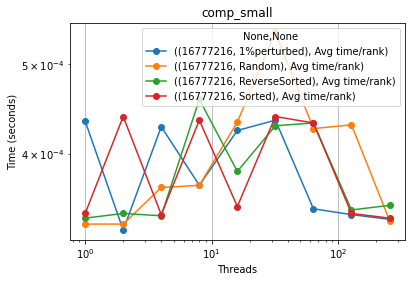

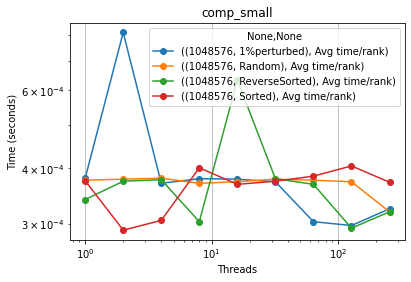

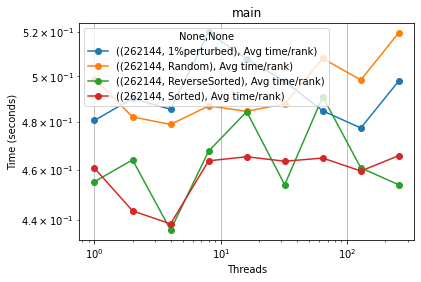

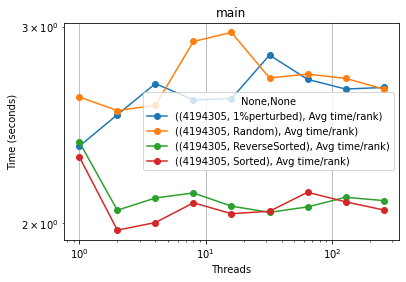

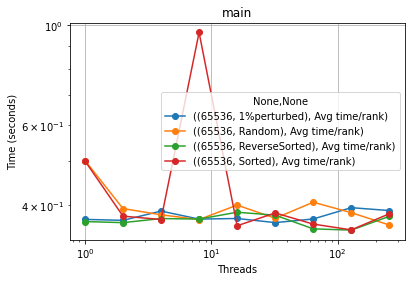

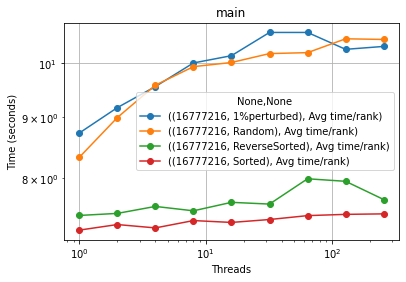

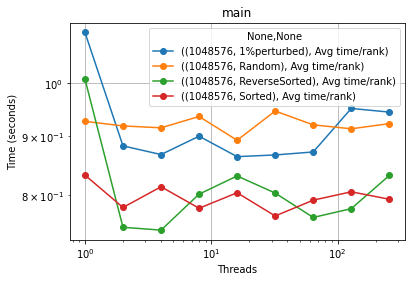

In [25]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


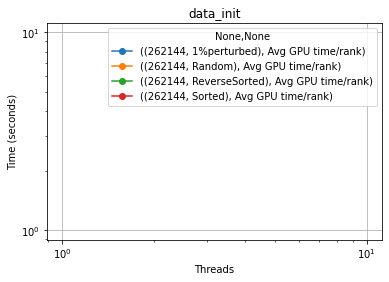

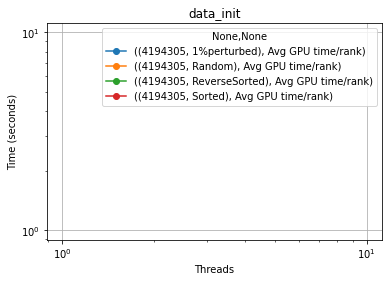

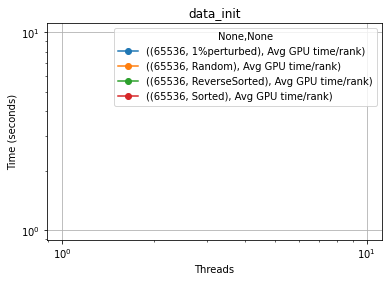

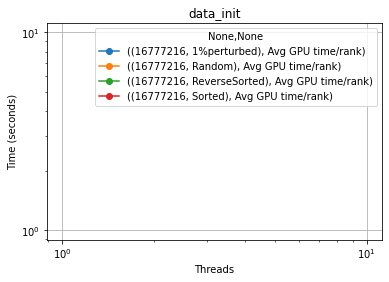

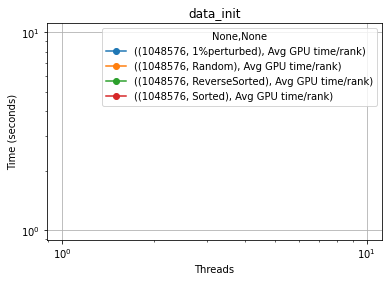

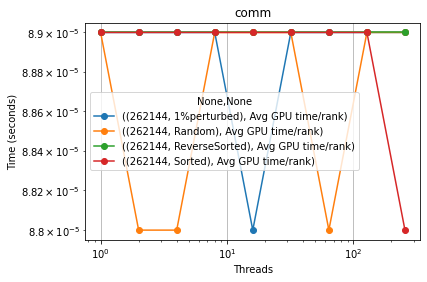

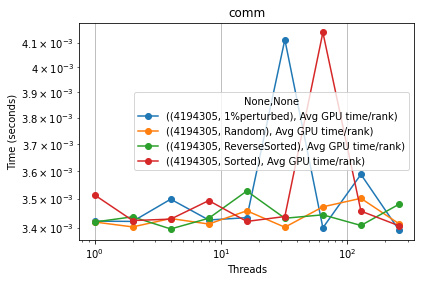

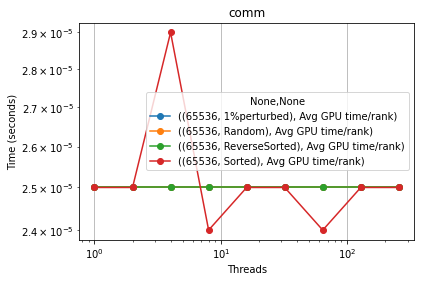

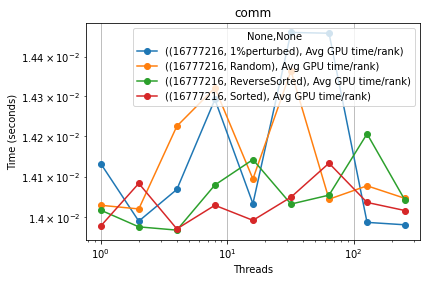

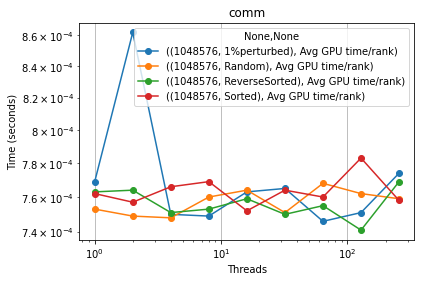

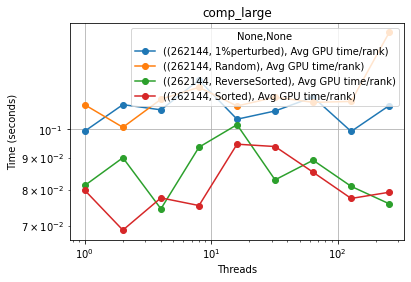

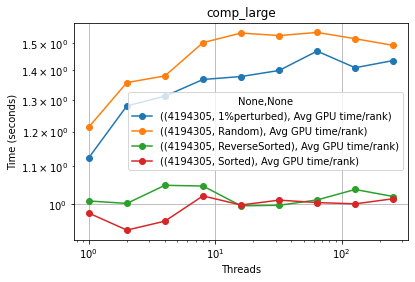

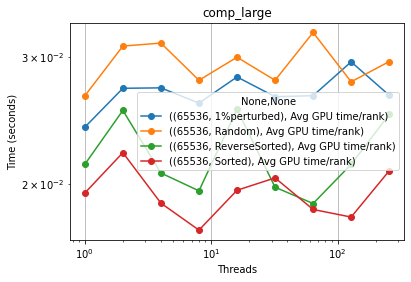

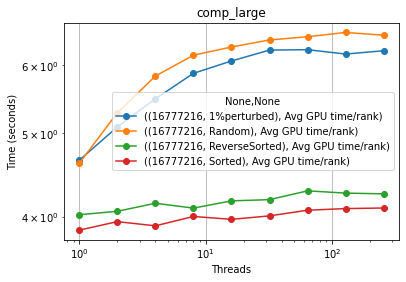

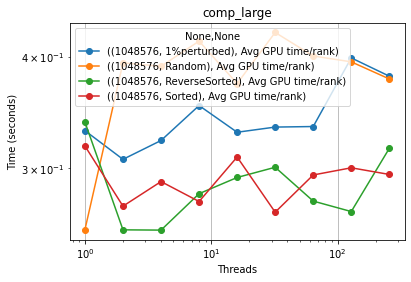

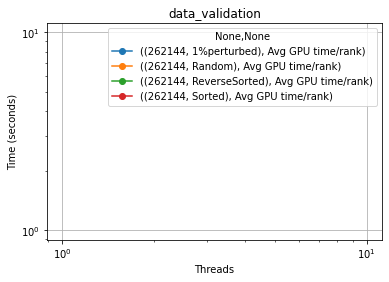

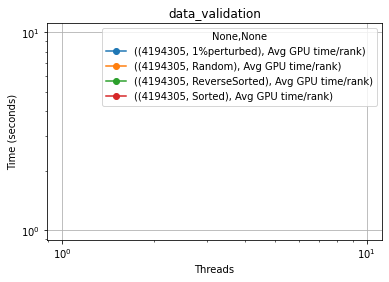

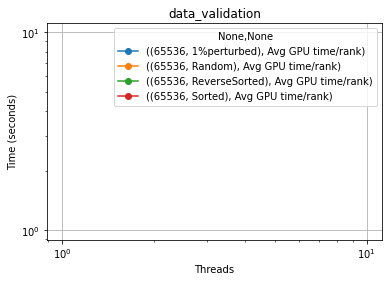

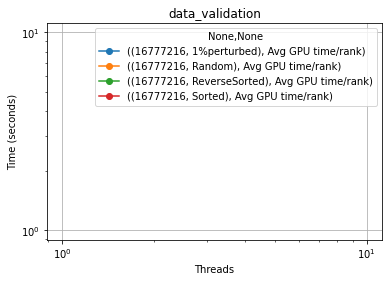

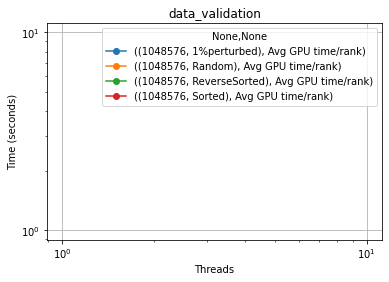

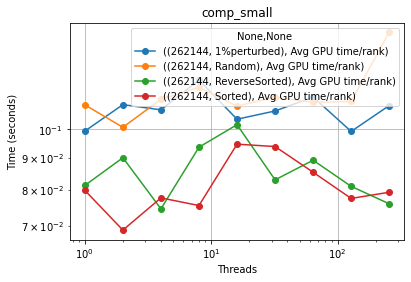

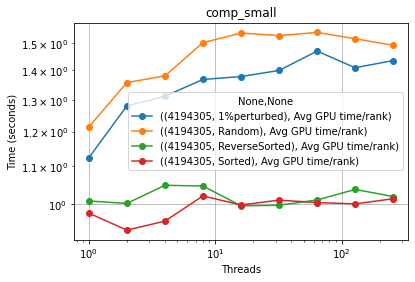

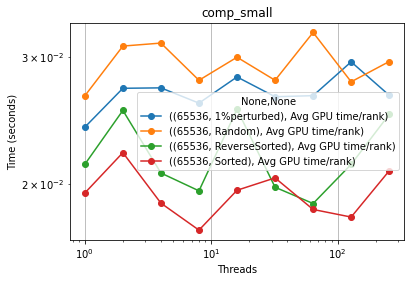

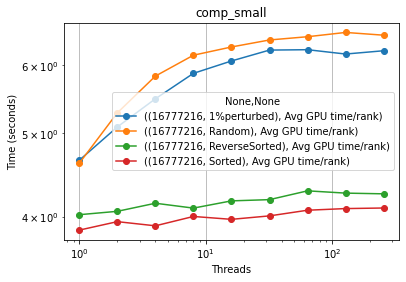

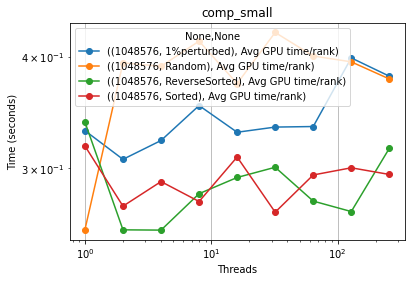

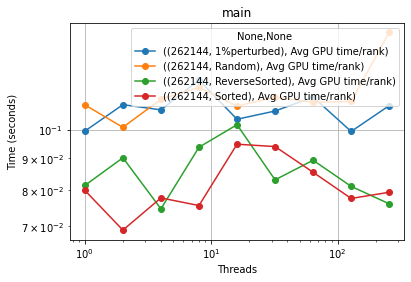

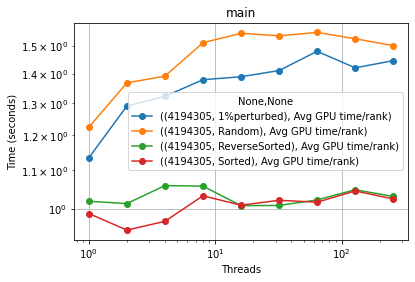

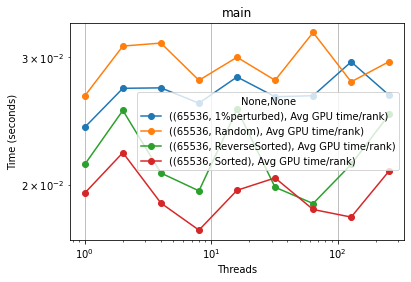

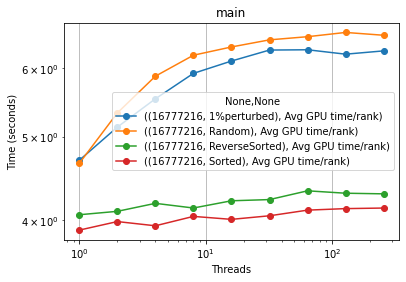

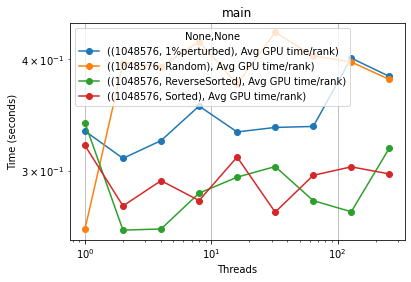

In [26]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg GPU time/rank"]].loc[name],
            title=name,
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

## Speedup

In [27]:
ctk.dataframe

(65536, 1%perturbed)                    \
                                   Avg time/rank Avg GPU time/rank   
name            num_threads                                          
main            1                       0.371744          0.024003   
                2                       0.369946          0.027167   
                4                       0.387817          0.027204   
                8                       0.372297          0.025912   
                16                      0.373442          0.028166   
                32                      0.365704          0.026445   
                64                      0.372533          0.026536   
                128                     0.394595          0.029552   
                256                     0.388869          0.026569   
comm            1                       0.000161          0.000025   
                2                       0.000138          0.000025   
                4                       0.000155          0.000025   
                8                       0.000174          0.000025   
                16                      0.000141          0.000025   
                32                      0.000145          0.000025   
                64                      0.000138          0.000025   
                128                     0.000153          0.000025   
                256                     0.000155          0.000025   
comp_large      1                       0.000439          0.023955   
                2                       0.000328          0.027118   
                4                       0.000340          0.027155   
                8                       0.000424          0.025864   
                16                      0.000418          0.028117   
                32                      0.000404          0.026397   
                64                      0.000326          0.026488   
                128                     0.000342          0.029504   
                256                     0.000416          0.026520   
comp_small      1                       0.000335          0.023955   
                2                       0.000242          0.027118   
                4                       0.000256          0.027155   
                8                       0.000320          0.025864   
                16                      0.000314          0.028117   
                32                      0.000305          0.026397   
                64                      0.000241          0.026488   
                128                     0.000257          0.029504   
                256                     0.000314          0.026520   
data_init       1                       0.003032               NaN   
                2                       0.003024               NaN   
                4                       0.003113               NaN   
                8                       0.003120               NaN   
                16                      0.003034               NaN   
                32                      0.003020               NaN   
                64                      0.003041               NaN   
                128                     0.003096               NaN   
                256                     0.003085               NaN   
data_validation 1                       0.008538               NaN   
                2                       0.008531               NaN   
                4                       0.008639               NaN   
                8                       0.008615               NaN   
                16                      0.008521               NaN   
                32                      0.008489               NaN   
                64                      0.008546               NaN   
                128                     0.008643               NaN   
                256                     0.008719               NaN   

                            (65536, R

In [28]:
temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["comp"]
temp_df.iloc[0]/temp_df
#speedup example



KeyError: 'comp'

In [ ]:
for name in function_names:
    for size in input_sizes:
        temp_df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name]
        
        plot_pandas(
            df=temp_df.iloc[0]/temp_df,
            title=f"{name}: thread-1/thread-N",
            xlabel="Threads",
            ylabel="Speedup",
            loglog=False
        )

# speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

# for name in function_names:
#     plot_pandas(
#         df=speedup_df.loc[name],
#         title=f"{name}: thread-1/thread-N",
#         xlabel="Threads",
#         ylabel="Speedup",
#         loglog=False
#     )

In [ ]:
ctk.dataframe.index